In [48]:
#kanzen.csvというファイルを最終的な元データとして扱う

import pandas as pd
import ast
import collections

df = pd.read_csv('deno.land_dependencies_import_https_all.csv',encoding = "shift_jis")
imp_li = df['import'].values.tolist()
orig_li = df['original'].values.tolist()

#for i in range(len(orig_li)):
#    orig_li[i] = ast.literal_eval(orig_li[i])
#
#comb_li[i] = ast.literal_eval(comb_li[i])
    
a = []
for i in range(len(imp_li)):
    a.append([])
    a[i].append(orig_li[i])
    a[i].append(imp_li[i])

#k = pd.DataFrame(a,columns=['original','import'])
#k.to_csv("kanzen.csv", encoding="shift_jis", index = False)

In [30]:
import pandas as pd

df_orig = pd.read_csv('import_side2.csv')
df_impo = pd.read_csv('export_side2.csv')

orig_li = df_orig.values.tolist()
impo_li = df_impo.values.tolist()

a = []
for i in range(len(orig_li)):
    a.append([])
    d_orig = dict([('module', orig_li[i][0]), ('org', str(orig_li[i][1])), ('package', orig_li[i][2]), ('version', str(orig_li[i][3]))])
    d_impo = dict([('module', impo_li[i][0]), ('org', str(impo_li[i][1])), ('package', str(impo_li[i][2])), ('version', str(impo_li[i][3]))])
    a[i].append(d_orig)
    a[i].append(d_impo)
    
k = pd.DataFrame(a,columns=['original','import'])
k.to_csv("kanzen_dict.csv", encoding="shift_jis", index = False)


'''
kannzenn_dict.csvには、[import],[export]の関係をまとめた。
その結果、23675の依存関係を採集することができた。
'''

In [31]:
import pandas as pd
import ast

df_dict = pd.read_csv('kanzen_dict.csv')
imp_li = df_dict['import'].values.tolist()
orig_li = df_dict['original'].values.tolist()
all_li = df_dict.values.tolist()

for i in range(len(orig_li)):
    orig_li[i] = ast.literal_eval(orig_li[i])
    imp_li[i] = ast.literal_eval(imp_li[i])

a = []
b = []    
for i in range(len(orig_li)):
    if orig_li[i]['package'] == 'polkadot':
        a.append([orig_li[i],imp_li[i]])
    else:
        b.append([orig_li[i],imp_li[i]])
        
        

print(len(a))
print(len(b))
print(len(orig_li))

#k = pd.DataFrame(a,columns=['original','import'])
#k.to_csv("polkadot_dict.csv", encoding="shift_jis", index = False)

l = pd.DataFrame(b,columns=['original','import'])
l.to_csv("polkadot_nashi_dict.csv", encoding="shift_jis", index = False) 
'''
kanzen_dict.csvをpolkadotありとなしのcsvファイルに分類した。
あり→20040個、　なし→3635個になり、polkadotという一つのコミュニティが大きい割合を示していたことが明らかになった。
'''

3635
20040
23675


In [2]:
import pandas as pd
import ast

df_dict = pd.read_csv('polkadot_nashi_dict.csv')
imp_li = df_dict['import'].values.tolist()
orig_li = df_dict['original'].values.tolist()

for i in range(len(orig_li)):
    orig_li[i] = ast.literal_eval(orig_li[i])
    imp_li[i] = ast.literal_eval(imp_li[i])

    

print(orig_li[0])
modname_li = []

for i in range(len(orig_li)):
     if orig_li[i] not in modname_li:
            modname_li.append(orig_li[i])

        
ex_li = []
kekka_li = []
kekka_li2 = []#2以上
for i in range(len(modname_li)):            
    ex_li.append([])
    kekka_li.append([])
    
for i in range(len(modname_li)):
    for j in range(len(orig_li)):
        if modname_li[i] == orig_li[j]:
            ex_li[i].append(imp_li[j])

            

for i in range(len(ex_li)):
    kekka_li[i].append(modname_li[i])
    kekka_li[i].append(ex_li[i])
    
for i in range(len(kekka_li)):
    if len(ex_li[i]) > 1:
        kekka_li2.append([modname_li[i],ex_li[i]])

#k = pd.DataFrame(kekka_li,columns=['original','imports'])
#k.to_csv("polkadot_nashi_allimports.csv", encoding="shift_jis", index = False) 

l = pd.DataFrame(kekka_li2,columns=['original','imports'])
l.to_csv("polkadot_nashi_over2imports_kari.csv", encoding="shift_jis", index = False) 
'''
polkadotなしのファイルから、originalの部分が一致するimport先を集めたファイルを作った。
'''

{'module': 'deno.land/x/30_seconds_of_typescript/util.test.ts', 'org': 'nan', 'package': '30_seconds_of_typescript', 'version': 'v1.0.1'}


In [ ]:
ex_li = []#memo

for i in range(len(orig_li)):
    for j in range(len(orig_li)):

        if orig_li[i]['module'] == orig_li[j]['module']:
            if orig_li[j] not in ex_li:
                ex_li.append(orig_li[j]['module'])
    print(list(set(ex_li)))


In [46]:
#「組み合わせ」,「importしているモジュール」のファイルをつくる

import pandas as pd
import ast

df_dict = pd.read_csv('polkadot_nashi_over2imports.csv')
imp_li = df_dict['imports'].values.tolist()
orig_li = df_dict['original'].values.tolist()

for i in range(len(orig_li)):
    orig_li[i] = ast.literal_eval(orig_li[i])
    imp_li[i] = ast.literal_eval(imp_li[i])

a = []    
b = []    
for i in range(len(orig_li)):
    a.append([])
    b.append([])
for i in range(len(orig_li)):
    for j in range(len(imp_li[i])):
        a[i].append(imp_li[i][j]['module'])
        
for i in range(len(orig_li)):
    b[i].append(orig_li[i])
    b[i].append(imp_li[i])
    b[i].append(a[i])
    
l = pd.DataFrame(b,columns=['original','import','ver_nashi'])
l.to_csv("polkadot_nashi_o2vernashi.csv", encoding="shift_jis", index = False) 


'''
組み合わせの集計のために、versionなしのimportリストを作った。
'''

In [8]:
import ast

df = pd.read_csv('polkadot_nashi_o2vernashi.csv',encoding = "latin-1")
all_mod_list = df['ver_nashi'].values.tolist()
#all_list = df.values.tolist()

#all_mod = []


for i in range(len(all_mod_list)):
    all_mod_list[i]=ast.literal_eval(all_mod_list[i])

n = len(all_mod_list)

print(all_mod_list[0])
    

new_list = []
for i in range(n):
    for j in range(n):
        if j != i:
            #kumi_list = []
            #kumi_list2 = []
            x = {}
            x = set(all_mod_list[i]) & set(all_mod_list[j])
            
            if len(x) > 1:
                #kumi_list.append(x)
                #kumi_list2.append(all_list[j][0])
                #kumi_list2.append(all_list[i][0])
                #kumi_list.append(kumi_list2)
                new_list.append([x])
                
print(len(new_list))  

exist_li = []
new_list_a = []
for i in range(len(new_list)):
    if new_list[i] not in exist_li:
        new_list_a.append(list(new_list[i]))
        exist_li.append(new_list[i])

    



k = pd.DataFrame(new_list_a,
                  columns=['combination'])
k.to_csv("combination_kari.csv", encoding="shift_jis", index = False)


'''
存在する組み合わせのリストを作った。
'''

['deno.land/std/fs/mod.ts', 'deno.land/std/path/mod.ts', 'deno.land/std/fs/mod.ts', 'deno.land/std/path/mod.ts']
295902


In [79]:
import pandas as pd
import ast

df_combi = pd.read_csv('combination.csv')
df = pd.read_csv('polkadot_nashi_o2vernashi.csv',encoding = "latin-1")
all_mod_li = df['ver_nashi'].values.tolist()
orig_li = df['original'].values.tolist()
imp_li = df['import'].values.tolist()
combi_li = df_combi['combination'].values.tolist()

for i in range(len(combi_li)):
    combi_li[i]=ast.literal_eval(combi_li[i])

for i in range(len(all_mod_li)):
    all_mod_li[i]=ast.literal_eval(all_mod_li[i])
    orig_li[i]=ast.literal_eval(orig_li[i])
    
x = set(all_mod_li[0]) & combi_li[0]

print(combi_li[0] <= set(all_mod_li[0]))
a = []

for i in range(len(combi_li)):
    a.append([])

for i in range(len(all_mod_li)):
    for j in range(len(combi_li)):
        if combi_li[j] <= set(all_mod_li[i]):
            a[j].append(orig_li[i])
            
            
new_li = []
for i in range(len(combi_li)):
    new_li.append([])
    new_li[i].append(combi_li[i])
    new_li[i].append(a[i])
    

k = pd.DataFrame(new_li,
                  columns=['combination','originals'])
k.to_csv("conbi_orig.csv", encoding="shift_jis", index = False)

True


In [9]:
import pandas as pd
import ast

df_combi = pd.read_csv('combi_orig.csv')
df_dict = pd.read_csv('polkadot_nashi_o2vernashi.csv',encoding = "latin-1")
all_mod_li = df_dict['ver_nashi'].values.tolist()
orig_li = df_dict['original'].values.tolist()
imp_li = df_dict['import'].values.tolist()
combi_li = df_combi['combination'].values.tolist()
combi_orig = df_combi['originals'].values.tolist()

for i in range(len(combi_li)):
    combi_li[i]=ast.literal_eval(combi_li[i])
    combi_orig[i]=ast.literal_eval(combi_orig[i])
    
for i in range(len(all_mod_li)):
    all_mod_li[i]=ast.literal_eval(all_mod_li[i])
    orig_li[i]=ast.literal_eval(orig_li[i])
    imp_li[i]=ast.literal_eval(imp_li[i])
    
a = []
a_2 = []
for i in range(len(combi_orig)):
    a.append([])
    a_2.append([])

for i in range(len(combi_orig)):
    for j in range(len(combi_orig[i])):
        
        for k in range(len(orig_li)):
            
            if combi_orig[i][j]['module'] == orig_li[k]['module']:
                li = []
                for l in list(combi_li[i]):
                    for m in imp_li[k]:
                        if l == m['module']:
                            li.append(m)
                a_2[i].append(li)
                if len(li) == len(combi_li[i]):
                    a[i].append(li)    #セット型で比べろ！！

#combi_origのリストにaを追加したい

b = []
b_2 = []
for i in range(len(combi_li)):
    b.append([])
    b[i].append(combi_li[i])
    b[i].append(combi_orig[i])
    b[i].append(a[i])
    b_2.append([])
    b_2[i].append(combi_li[i])
    b_2[i].append(combi_orig[i])
    b_2[i].append(a_2[i])

    
#k = pd.DataFrame(b,
#                  columns=['combination','originals','rekkyo'])
#k.to_csv("kumiawase_rekkyo_kari.csv", encoding="shift_jis", index = False)

k = pd.DataFrame(b_2,
                  columns=['combination','originals','rekkyo'])
k.to_csv("kumiawase_rekkyo_all.csv", encoding="shift_jis", index = False)

In [12]:
import pandas as pd
import ast

df = pd.read_csv('kumiawase_rekkyo_all.csv')



k = df[df['combination'].str.contains('polkadot')]
k.to_csv("kumiawase_rekkyo_polkadotari_all.csv", encoding="shift_jis", index = False)

In [11]:
import pandas as pd
import ast

df = pd.read_csv('kumiawase_rekkyo_all.csv')#元はkariだった

df[~(df['combination'].str.contains('polkadot'))]

k = df[~(df['combination'].str.contains('polkadot'))]
k.to_csv("kumiawase_rekkyo_polkadotnashi_all.csv", encoding="shift_jis", index = False)

In [15]:
import pandas as pd
import ast

df_combi = pd.read_csv('kumiawase_rekkyo_polkadotnashi_all.csv')
combi_li = df_combi['combination'].values.tolist()
combi_orig = df_combi['originals'].values.tolist()
combi_rekkyo = df_combi['rekkyo'].values.tolist()

li = []
li_2 = []#tasita
combi_rekkyo_2 = []
combi_orig_2 = []
for i in range(len(combi_li)):
    combi_rekkyo_2.append([])#tasita
    combi_rekkyo_2[i]=ast.literal_eval(combi_rekkyo[i])#tasita
    combi_orig_2.append([])#tasita
    combi_orig_2[i]=ast.literal_eval(combi_orig[i])#tasita
    
    combi_li[i]=ast.literal_eval(combi_li[i])
    combi_orig[i]=ast.literal_eval(combi_orig[i])
    combi_rekkyo[i]=ast.literal_eval(combi_rekkyo[i])
    combi_li[i] = list(combi_li[i])
    li.append([])
    li_2.append([])
    #print(len(combi_orig[i]),len(combi_rekkyo[i]))
    
print(combi_li[0])
print(len(combi_rekkyo[0])) 

for i in range(len(combi_li)):
    for j in range(len(combi_li)):
        if i != j:
            if set(combi_li[i]) <= set(combi_li[j]):
                #combi_orig_2[i].extend(combi_orig_2[j])
                
                for l in range(len(combi_rekkyo[j])):
                    a = []
                    b = []
                    for m in range(len(combi_rekkyo[j][l])):
                        if combi_rekkyo[j][l][m]['module'] in combi_li[i]:
                            a.append(combi_rekkyo[j][l][m])
                            b.append(combi_rekkyo[j][l][m]['module'])
                            
                    li_2.append(a)#tasita
                    if len(a) == len(combi_li[i]):
                        if len(list(set(b))) == len(combi_li[i]):
                            li[i].append(a)
    combi_rekkyo[i].extend(li[i])
    
    

#print(combi_rekkyo[0])
kansei_li = []
kansei_li_2 = []#tasita

for i in range(len(combi_li)):
    kansei_li.append([])
    kansei_li[i].append(combi_li[i])
    kansei_li[i].append(combi_orig[i])
    kansei_li[i].append(combi_rekkyo[i])
    
    kansei_li_2.append([])#tasita
    kansei_li_2[i].append(combi_li[i])
    kansei_li_2[i].append(combi_orig_2[i])
    kansei_li_2[i].append(combi_rekkyo_2[i])
    

                    
                            
#k = pd.DataFrame(kansei_li,
#                  columns=['combination','originals','rekkyo'])
#k.to_csv("kumiawase_rekkyo_kansei.csv", encoding="shift_jis", index = False)

k2 = pd.DataFrame(kansei_li_2,
                  columns=['combination','originals','rekkyo'])
k2.to_csv("kumiawase_rekkyo_all_kansei.csv", encoding="shift_jis", index = False)


'''
version列挙のために、importした数が数を組み合わせの数に合致するものを評価したが、
母数に入れたいので、それではないcsvファイルも一応作っておきたい。
'''

['deno.land/std/fs/mod.ts', 'deno.land/std/path/mod.ts']
736


'\nversion列挙のために、importした数が数を組み合わせの数に合致するものを評価したが、\n母数に入れたいので、それではないcsvファイルも一応作っておきたい。\n'

In [63]:
import pandas as pd
import ast

df_combi = pd.read_csv('kumiawase_rekkyo_kansei.csv')
combi_li = df_combi['combination'].values.tolist()
combi_orig = df_combi['originals'].values.tolist()
combi_rekkyo = df_combi['rekkyo'].values.tolist()

li = []
for i in range(len(combi_li)):
    combi_li[i]=ast.literal_eval(combi_li[i])
    combi_orig[i]=ast.literal_eval(combi_orig[i])
    combi_rekkyo[i]=ast.literal_eval(combi_rekkyo[i])
    combi_li[i] = list(combi_li[i])
    li.append([])
    
print(combi_li[0])
print(len(combi_orig[0])) 

for i in range(len(combi_li)):
    for j in range(len(combi_li)):
        if i != j:
            if set(combi_li[i]) <= set(combi_li[j]):
                combi_orig[i].extend(combi_orig[j])
                

print(len(combi_orig[0]))

kansei_li = []

for i in range(len(combi_li)):
    kansei_li.append([])
    kansei_li[i].append(combi_li[i])
    kansei_li[i].append(combi_orig[i])
    kansei_li[i].append(combi_rekkyo[i])

    
    
k = pd.DataFrame(kansei_li,
                  columns=['combination','originals','rekkyo'])
k.to_csv("kumiawase_rekkyo_kanzenban.csv", encoding="shift_jis", index = False)




['deno.land/std/fs/mod.ts', 'deno.land/std/path/mod.ts']
253
1274


In [52]:
import pandas as pd
import ast

df_combi = pd.read_csv('kumiawase_rekkyo_kanzenban.csv')
combi_li = df_combi['combination'].values.tolist()
combi_orig = df_combi['originals'].values.tolist()
combi_rekkyo = df_combi['rekkyo'].values.tolist()

li = []
b = [] 
for i in range(len(combi_li)):
    combi_li[i]=ast.literal_eval(combi_li[i])
    combi_orig[i]=ast.literal_eval(combi_orig[i])
    combi_rekkyo[i]=ast.literal_eval(combi_rekkyo[i])
    combi_li[i] = list(combi_li[i])
    li.append([])
    b.append([])
    
    
    
for i in range(len(combi_rekkyo)):
    for j in range(len(combi_rekkyo[i])):
        a = []
        for k in combi_rekkyo[i][j]:
            a.append(k['version'])
        #print(a)
        li[i].append(a)
    #print(len(li[i]))


for i in range(len(combi_li)):
    b[i].append(combi_li[i])
    b[i].append(li[i])
    
k = pd.DataFrame(b,
                  columns=['combination','version_rekkyo'])
k.to_csv("combi_versionrekkyo.csv", encoding="shift_jis", index = False)

In [16]:
import pandas as pd
import ast
from packaging import version

df_combi = pd.read_csv('combi_versionrekkyo.csv')
combi_li = df_combi['combination'].values.tolist()
version_li = df_combi['version_rekkyo'].values.tolist()

li = []
b = [] 
for i in range(len(combi_li)):
    combi_li[i]=ast.literal_eval(combi_li[i])
    version_li[i]=ast.literal_eval(version_li[i])
    li.append([])
    b.append([])

    
#print(version_li[0])

for i in range(len(version_li)):
    for j in range(len(version_li[i])):
        for k in range(len(version_li[i][j])):
            if version_li[i][j][k] == 'nan':
                version_li[i][j][k] = '0.0.0' #バージョン定義されていないものを'0.0.0'と据え変えて置く。
                
#print(version_li[0])
    

#まず、左側の値をparse_versionにかけて小さい順に並び替えて、matpotlibで

minamal_ver = ''
minimal_id = 0
minimal_li = []
hidari_li = []
kansei_li = []
a = []
for i in range(len(version_li[613])):
    hidari_li.append(version_li[613][i][0])

    
for i in range(0,len(hidari_li)-1,1):
    for j in range(i,len(hidari_li),1):
        if version.parse(hidari_li[j]) < version.parse(hidari_li[i]):
            minimal_ver = hidari_li[i]
            hidari_li[i] = hidari_li[j]
            hidari_li[j] = minimal_ver
    


for i in range(len(hidari_li)):
    for j in range(len(version_li[613])):
        if j not in minimal_li:
            if hidari_li[i] == version_li[613][j][0]:
                kansei_li.append(version_li[0][j])
                minimal_li.append(j)
                
print(kansei_li)

k = pd.DataFrame(kansei_li)
k.to_csv("graph_ka.csv", encoding="shift_jis", index = False)


'''
for i in range(len(version_li)):
    for j in range(len(version_li[i])):
        if j not in minimal_id_li:
            minimal_li = version_li[i][j]
            if version.parse(version_li[i][j][0]) < version.parse(minimal_li[0]):
                minimal_li = version_li[i][j]
                minimal_id = j
            
    li[i].append(minimal_li)
    minimal_id_li.append(minimal_id)
'''
'''
for i in range(0,len(version_li[0])-1,1):
    for j in range(i,len(version_li[0]),1):
        if version.parse(version_li[0][j][0]) < version.parse(version_li[0][i][0]):
            minimal_li = version_li[0][i]
            version_li[0][j] = version_li[0][i]
            version_li[0][i] = version_li[0][j]

            
print(version_li[0])
'''

[['0.125.0', '0.125.0'], ['0.0.0', '0.0.0'], ['0.125.0', '0.125.0'], ['0.85.0', '0.85.0'], ['0.85.0', '0.85.0']]


'\nfor i in range(0,len(version_li[0])-1,1):\n    for j in range(i,len(version_li[0]),1):\n        if version.parse(version_li[0][j][0]) < version.parse(version_li[0][i][0]):\n            minimal_li = version_li[0][i]\n            version_li[0][j] = version_li[0][i]\n            version_li[0][i] = version_li[0][j]\n\n            \nprint(version_li[0])\n'

[2, 0, 2, 1, 1]
[20, 10, 20, 20, 20]


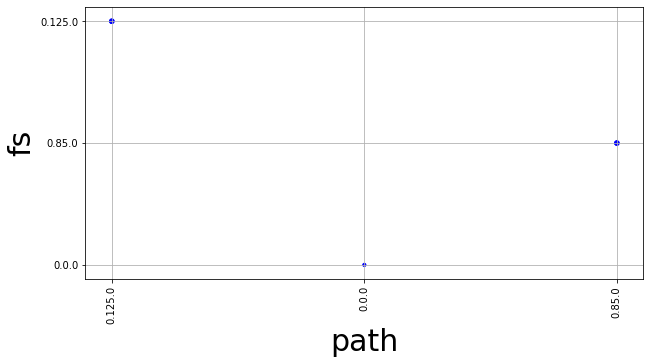

In [20]:
import pandas as pd
import ast
from packaging import version
import matplotlib.pyplot as plt

df_combi = pd.read_csv('graph_ka.csv')

version_li = df_combi.values.tolist()

li = []
b = [] 
x = []
y = []
color = []
minimal_ver = ''
str_version_li = []
count_li = []
str_li = []
moji_li = []
y_count = []
for i in version_li:
    x.append(i[0])
    y.append(i[1])

b = list(set(y))

#print(b)
    
for i in range(len(version_li)):
    if version.parse(version_li[i][0]) == version.parse(version_li[i][1]):
        color.append('b')
        
    if version.parse(version_li[i][0]) < version.parse(version_li[i][1]):
        color.append('r')
        
    if version.parse(version_li[i][0]) > version.parse(version_li[i][1]):
        color.append('y')

for i in range(0,len(b)-1,1):
    for j in range(i,len(b),1):
        if version.parse(b[j]) < version.parse(b[i]):
            minimal_ver = b[i]
            b[i] = b[j]
            b[j] = minimal_ver
            
            
for i in range(len(version_li)):
    str_li.append(str(version_li[i]))
    
for i in range(len(y)):
    for j in range(len(b)):
        if y[i] == b[j]:
            y_count.append(j)
            
print(y_count)

for i in range(len(str_li)):
    count_li.append(str_li.count(str_li[i]))
    count_li[i]*=10
        


print(count_li)
for i in range(len(b)):
    li.append(i)
    

plt.figure(figsize=(10,5))
plt.xticks(rotation=90)#文字を90度回転（文字の重なりを消去）
plt.yticks(li,b)
plt.xlabel('path',fontsize = 30)
plt.ylabel('fs',fontsize = 30)
plt.grid(True)
plt.scatter(x, y_count, c = color, s = count_li, alpha=1)

#同じだったら青色、x軸の方が低かったら赤色、y軸の方が低かったら緑色